# **Trabajo Final de Procesamiento de Lenguaje Natural**

**Nombre** : Eliazar Noa Llasccanoa

**Codigo** :  193003

**Curso**  : Machine Learning

# Analisis de Sentimientos en tweets con  los métodos de Nayve Bayes, MLP y LSTM
<img src="images/twitt.jpg" style="width: 600px;"/>

* En este notebook vamos a realizar un trabajo de analsiis de sentimientos  de una serie de tweets etiquetados de personas. 
* Los pasos que vamos a seguir estan basados en la metodologia CRISP-DM(Cross-Industry Standard Process for Data Mining)
y se muestran a continuacion:

1. Lectura y Comprensión del Proyecto
  * Situación Problemática
  * Determinación de los objetivos
    * Objetivos Generales
    * Objetivos Específicos
  * Evaluación de la situación
    * Conjunto de datos disponibles
    * Criterios para determinar el rendimiento del modelo
  * Producción de un plan de proyecto
    * Arquitectura metodológica
    * Evaluación de las herramientas y técnicas 
2. Comprensión de los datos
  * Librerías
  * Recopilación y lectura de datos
  * Descripción de los datos
  * Exploración de los datos 
  * Verificación de la calidad de los datos 
3. Preparación de los datos
  * Selección de los datos 
  * Limpieza, reducción y tratamiento de los datos 
  * Preprocesamiento
    * Normalización
    * Eliminación de enlaces 
    * Tratamiento de duplicidad de caracteres 
    * Bolsa de palabras
  * Tokenización
  * Extraccion de caracteristicas (Bolsa de palabras)
  * Reducción de características
    * Stop Word
    * Lematización
    * Stemming
  * Partición de los datos (Test Train)
4. MODELOS
  * Naive Bayes
    * Creación de la Bolsa de Palabras (BoW)
    * Particionado de los datos con el método del 'Cross Validation'
    * Creación del modelo
    * Multinomial Naive Bayes (distribución de Naive Bayes para variables discretas )
  * MLP
    * Bolsa de palabras y codificación del target
    * Definición de la Red Neuronal
    * Entrenamiento de la Red Neuronal
  * LSTM
    * One-Hot Encoding y codificación del target
    * Creación de las secuencias de palabras
    * Definición de la Red Neuronal
    * Entrenamiento de la Red Neuronal
5. Evaluación 
6. Despliegue
 
<hr>

# **1.Lectura  y Comprension del Negocio**

### **SITUACION PROBLEMATICA**

### **DETERMINACION DE LOS OBJETIVOS**

**OBJETIVO GENERAL**
* Analisis de sentimeintos utilizando NAIVE BAYES, MLSP Y LSTM 

**OBJETIVOS ESPECIFICOS:**


### **EVALUACION DE LA SITUACION**

**CONJUNTO DE DATOS DISPONIBLES**


**CRITERIOS PARA DETERMINAR EL RENDIMIENTO DEL MODLEO**
* Mejor Presicion
* Sin mucho sobre ajuste
* Mejor en Tiempo y Espacio de Ejecucion
* Error cuadratico minimo

### **PRODUCCION DE UN PALN DEL PROYECTO**

**ARQUITECTURA METODOLOGICA**

**ARQUITECTURA METODOLOGICA**

**EVALUACION DE HERRAMIENTAS Y TECNICAS**

# **2.Comprension de los datos**

## 2.1 Librerías

In [6]:
'''Importar las bibliotecas de python necesarias para el análisis de datos
    numpy se usa para facilitar la creación de matrices que son más simples, más fáciles de manipular
    pandas se usa principalmente para crear y manipular marcos de datos (tablas), creados originalmente a partir de numpy
    matplotlib se usa para funciones en la creación de visualización de datos '''
import  numpy as np # álgebra lineal
import pandas as pd # procesamiento de datos, E/S de archivo CSV (por ejemplo, pd.read_csv)
import matplotlib.pyplot as plt # visualizacion de datos 
import datetime
import numpy as np
import time
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

## 2.2 Recopilación y lectura de datos

* El conjunto de datos fue extraido de la base de datos Twitter Tweets Sentiment 
para el procesamientod e lenguaje natural 
* en formato csv

https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset

In [11]:
'''Cargar conjunto de datos'''
df = pd.read_csv("Tweets.csv")
'''Eliminar filas que contienen valores nulos, para que no interfieren 
con el manejo de datos debido a diferentes tipos de datos'''
df = df.dropna()
'''verificar el conjunto de datos'''
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


## 2.3 Descripción de los datos

**Cantidad de los datos**

In [4]:
# EL tamaño del dataframe
print("Numero de Tweets   : ", df.shape[0])
print("Numero de columnas : ", df.shape[1])

Numero de Tweets   :  27480
Numero de columnas :  4


**Descripcion del dataset**

In [5]:
# Mostramos las columnas del dataframe
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

EL conjunto de datos contine 4 columnas
  * textID: ID del tuit, el cual no proporciona no proporciona ninguna información
  * text: texto del tuit
  * selected_text : es un fragmento de 'texto' que se utiliza para determinar el 'sentimiento' del tuit en cuestión.
  * sentiment: etiqueta del tuit (positive, negative, neutro)
  
El campo **`sentiment`** es la etiqueta de los tuits 

Variable | Detalle
--- | :---
`1. textID` | ID del tuit en cuestion
`2. text` | texto del tuit en cuestion
`3. selected_text` | es un resumen del tuit en cuestion
`4. sentiment	` | la etiqueta del tuit con  los siguientes niveles de polaridad(positivo, negativo, neutro)

In [6]:
'''Verificar si hay valores nulos'''
df['sentiment'].isnull().sum()

0

Como se puede observar no existen valores vacios

**Informacion del Dataframe**

In [7]:
# Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


El tipo de datos de  todas las columnas es de tipo objeto (string)

In [8]:
# Descripcion del dataframe
df.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


**Esquema de codificacion**

En la represenatciones de algunas de las variables categoricas se utilizaron valores numericos como en:
 El esquema de codificacion de los tuit sera ONE HOT o SKIPGRAM

## 2.3 Exploración de los datos 

### **Tweets publicados por sentimiento**

In [9]:
df_count = df.groupby('sentiment')['text'].count().reset_index().sort_values(by='text', ascending=False)
df_count['PCT'] = (df_count['text'] / df_count['text'].sum())*100
df_count.style.background_gradient(cmap='Purples')


,sentiment,text,PCT
1,neutral,11117,40.454876
2,positive,8582,31.229985
0,negative,7781,28.315138


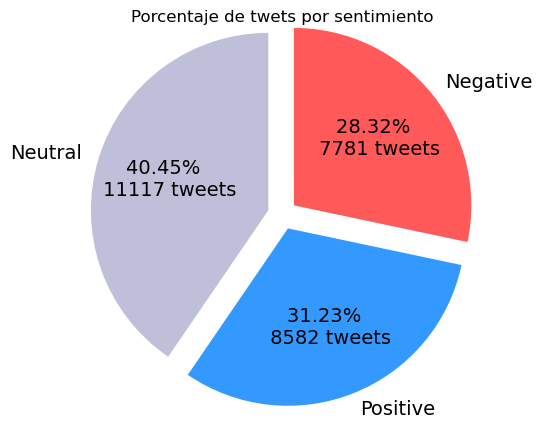

In [10]:
'''Cuenta el número de filas para cada tipo de sentimiento'''
'''Calcular el número de filas según el tipo de sentimiento, luego asignarlo a la variable df_sen para su uso posterior'''
df_sen = df['sentiment'].value_counts()
'''Plot persentase jenis sentimen & jumlahnya'''
df_sen = df['sentiment'].value_counts()
sen_colors = ['#BFBFD9','#3399FF', '#FF5959']
sen_labels = ['Neutral', 'Positive','Negative']

plt.pie(df_sen, colors=sen_colors, labels=sen_labels, \
        startangle=90, explode=(0.1, 0.1, 0.1), \
        autopct= lambda p : f'{p:.2f}% \n {p*sum(df_sen)/100:.0f} tweets', \
        radius=1.2, textprops={'fontsize': 14})
plt.title('Porcentaje de twets por sentimiento')
plt.show()

Dibujemos un gráfico de embudo para una mejor visualización

In [13]:
fig = go.Figure(go.Funnelarea(
    text =df_count.sentiment,
    values = df_count.text,
    title = {"position": "top center", "text": "Gráfico de embudo de distribución de sentimiento"}
    ))
fig.show()

En el grafico circular se percibe el orden de frecuecnia de los tweets de sentimeintos:
41% son de tipo neutral
31% son de tipo positivo
28% son de tipo negativo

In [14]:
'''Encuentra las 10 palabras más frecuentes en cada tipo de sentimiento'''
#slice solo para tweets positivos
positivo = df[df['sentiment']=='positive']['selected_text']
#determinar las 10 palabras más usadas
most_pos = positivo.value_counts()[:10]

#slice solo para tweets negativos
negativo = df[df['sentiment']=='negative']['selected_text']
#determinar las 10 palabras más usadas
most_neg = negativo.value_counts()[:10]

#slice solo para tweets neutrales
neutral = df[df['sentiment']=='neutral']['selected_text']
#determinar las 10 palabras más usadas
most_neu = neutral.value_counts()[:10]

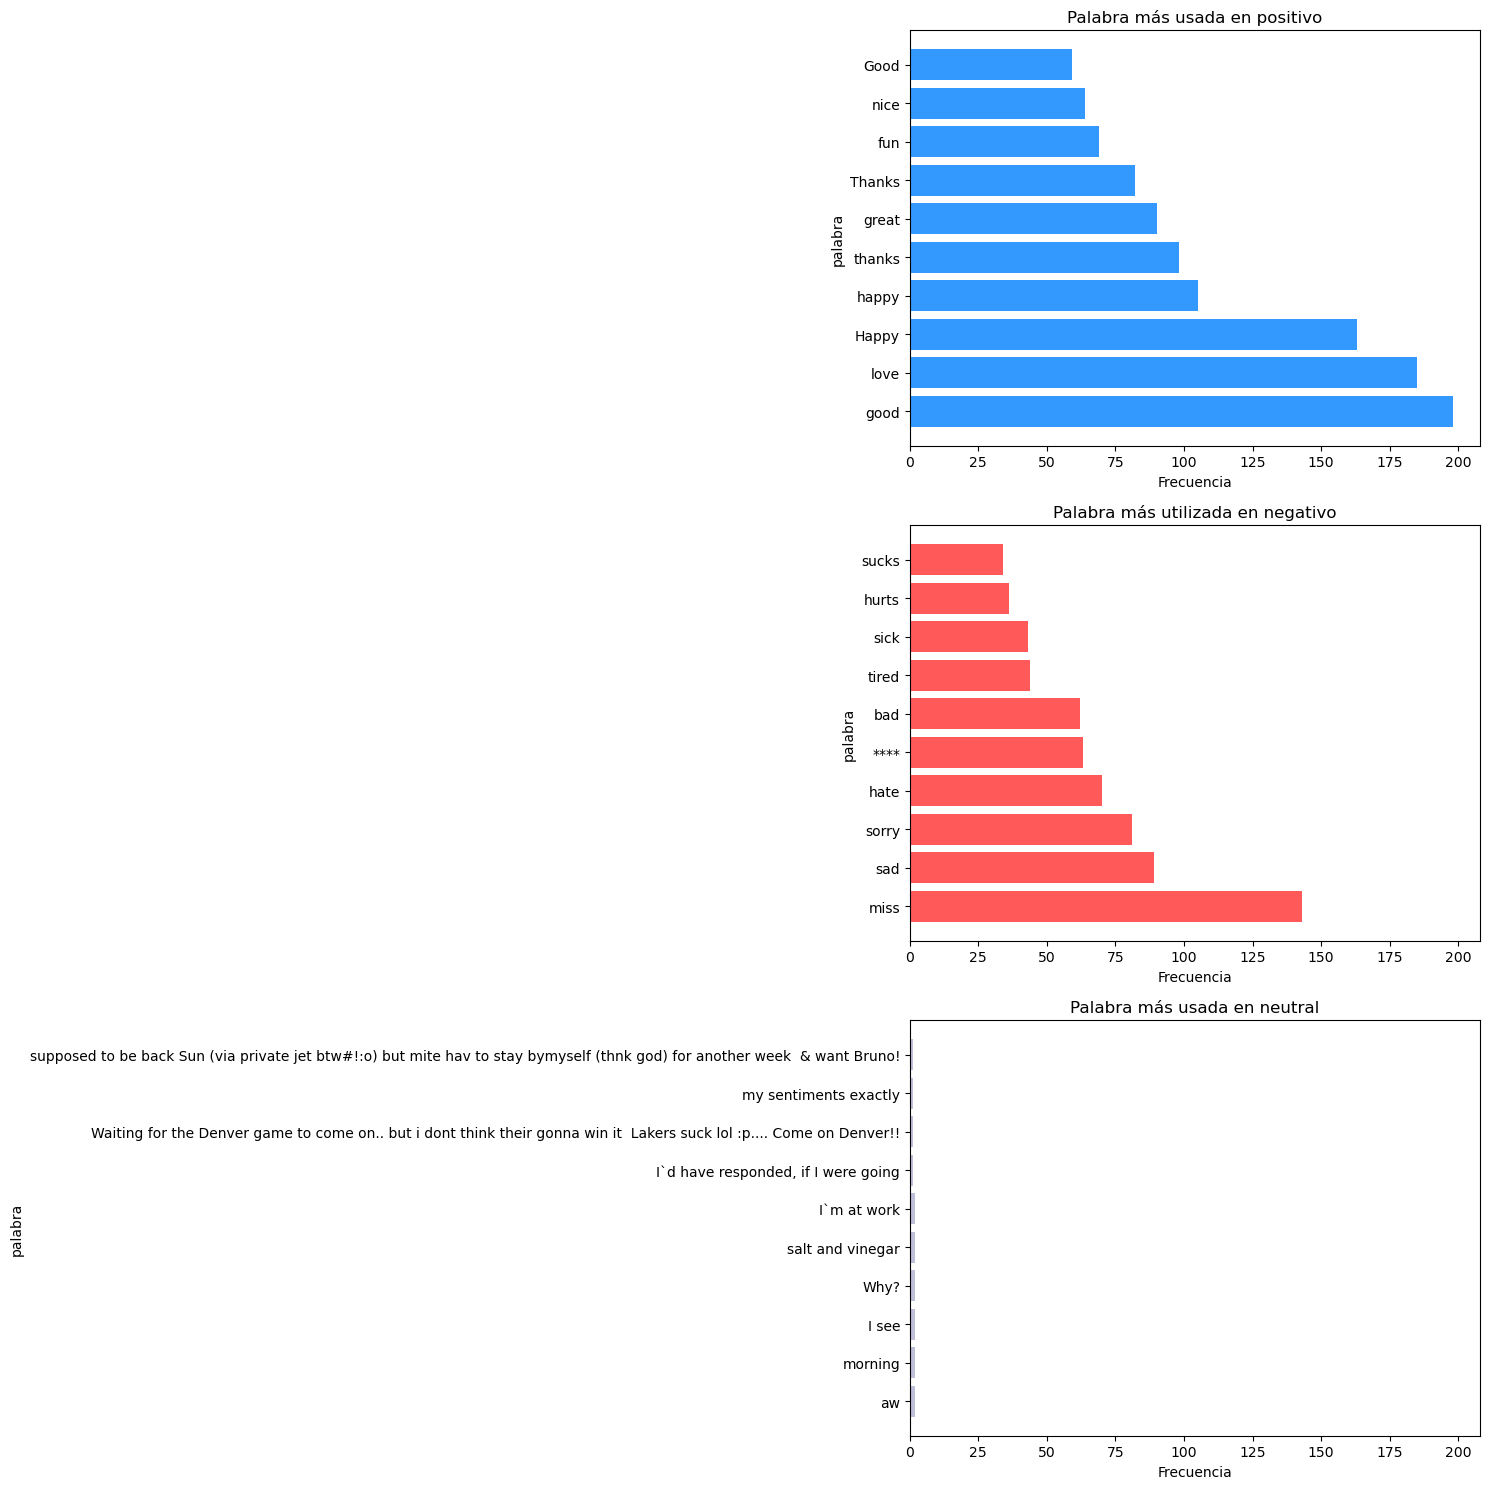

In [15]:
'''Ir a la visualización de cada variable arriba
    fig se usa para configurar el lienzo, aquí figsize es para determinar la longitud y el ancho '''
fig = plt.figure(figsize=(15,15))

'''este es para tuits neutrales'''
neu = fig.add_subplot(313)
neu.set_xlabel('Frecuencia')
neu.set_ylabel('palabra')
neu.set_title("Palabra más usada en neutral")
plt.barh(most_neu.index, most_neu.values, color='#BFBFD9')

'''este es para tuits positivos'''
pos = fig.add_subplot(311)
pos.set_xlabel('Frecuencia')
pos.set_ylabel('palabra')
pos.set_title("Palabra más usada en positivo")
plt.barh(most_pos.index, most_pos.values, color='#3399FF')

'''este es para tuits negativos'''
neg = fig.add_subplot(312)
neg.set_xlabel('Frecuencia')
neg.set_ylabel('palabra')
neg.set_title("Palabra más utilizada en negativo")
plt.barh(most_neg.index, most_neg.values, color='#FF5959')

'''get_shared_x_axes' se usa para que la escala en el eje X de cada tipo de sentimiento sea la misma, evitando sesgos en la comprensión de la visualización'''
pos.get_shared_x_axes().join(pos, neg, neu)
'''diseño ajustado para que las tramas secundarias no choquen entre sí'''
plt.tight_layout()
'''save fig es solo para guardar imágenes en nuestra computadora'''
plt.savefig("La mayoría de las palabras por opinión")

# **3.Preparacion de los datos**

* Nos quedamos solo con el tipo de sentimiento(positivo, neutral y negativo)  y el texto del tweet(text)

In [16]:
tweets = [list(x) for x in df[['text', 'sentiment']].values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))

Número de Tweets Cargados: 27480


<hr>


## Normalización


* Utilizamos ***spaCy*** para la tokenización y normalización.


* Tras realizar un análisis del contenido de los tweets pasamos a realizar las siguientes acciones para ***normalizar*** los tweets:
    1. Pasamos las frases a minúsculas.
    2. Sustituimos los puntos por espacios ya que hay muchas palabras unidas por un punto
    3. Quitamos la almuhadilla de los hashtags para considerarlos como palabras.
    4. Eliminamos los signos de puntuación.
    5. Eliminamos los enlaces(http) y las menciones (@)
    6. Pasamos la palabra a su lema


* Todos estos pasos los vamos a realizar en una misma función.

* Descartaremos aquellos tweets que tras ser normalizados no tengan por lo menos 3 palabras.


* ***NOTA***: Cuando trabajamos con Redes Neuronales Recurrentes y en especial con las LSTM aplicado al Procesamiento del Lenguaje Natural, no solo nos interesa saber las palabras que componen un tweet (o documento), si no tambien la secuencia de esas palabras dentro de la frase, por ese motivo ***vamos a tratar los tweets como secuencias de palabras y no como bolsas de palabras*** (como haciamos en los ejemplos anteriores). Por tanto no vamos a eliminar las palabras con menos de 3 caracteres ni las stop-words.


#### CUIDADO - IMPORTANTE:

* Dado que los procesos de normalización de textos son muy pesados y tardan mucho, se ha implementado despues de la normalización de los tweets, un proceso de guardado de los tweets ya normalizados. Por tanto:
    - Si es la primera vez que se ejecuta este notebook, se puede ejecutar completo sabiendo que se guardarán en un fichero binario los tweets normalizados. Este guardado se realiza [AQUI](#Escritura).
    - En caso de haberse ejecutado el proceso de normalización de tweets y haberse guardado este en un fichero binario, no será necesario ejecutar las dos siguientes celdas de código y bastaría con ejecutar la celda de código que lee el fichero binario con los tweets normalizados. Esto se hace en la siguiente [CELDA](#Lectura).

In [18]:
import spacy
import en_core_web_sm
from tqdm import tqdm # Medidor de progreso en un bucle 

nlp = en_core_web_sm.load()
def normalize(tweets, min_words=3):
    """
    Función que dada una lista de tweets ([tweet, clase]), normaliza los tweets y devuelve una lista
    con los tweets normalizados, descartando aquellos tweets que tras la normalización tengan menos de
    "min_words" palabras en el tweet.
    
    :param tweets:       Lista de Tweets ([tweet, clase]) con el tweet y la clase a la que pertenece
    :param min_words:    Número minimo de palabras que tiene que tener un tweet tras la normalización
    :return:             Lista de Tweets ([tweet, clase]) normalizados
    """
    tweets_list = []
    for tweet in tqdm(tweets):
        # Tokenizamos el tweets realizando los puntos 1,2 y 3.
        tw = nlp(tweet[0].lower().replace('.', ' ').replace('#', ' ').strip())
        
        # Normalizamos Puntos 4,5y 6
        tw = ([word.lemma_ for word in tw if (not word.is_punct)
               and (not word.text.startswith('@'))
               and (not word.text.startswith('http'))
               and (not ':' in word.text)])
        
        # Eliminamos los tweets que tras la normalización tengan menos de "min_words" palabras
        if len(tw) >= min_words:
            tweets_list.append([' '.join(tw), tweet[1]])
    return tweets_list

# Normalizamos las frases
X_norm = normalize(tweets)

100%|██████████| 27480/27480 [05:35<00:00, 81.85it/s] 


#### <a name="Escritura">Guardado de los tweets normalizados en un fichero binario</a>

* Se guarda una lista de listas, donde en cada una de las listas se tiene:
    - [0]: El Tweet normalizado
    - [1]: La clase a la que pertenece el Tweet

In [ ]:
import pickle

filename = './models/17_normalized_tweets_LSTM.pickle'
save_list = open(filename,"wb")
pickle.dump(X_norm, save_list)
save_list.close()

#### <a name="Lectura">Lectura de los tweets normalizados de un fichero binario</a>

* Lectura de una lista con la siguiente estructura:
    - [0]: El Tweet normalizado
    - [1]: La clase a la que pertenece el Tweet

In [17]:
import pickle

filename = './models/17_normalized_tweets_LSTM.pickle'
X_norm = pickle.load(open(filename, 'rb'))

# Algotimo Naive Bayes

<hr>


## Bolsa de palabras

* Pasamos a construir una bolsa de palabras de frecuencias.


* Vamos a utilizar (para construir la bolsa de palabras) la clase "*CountVectorizer*" de scikit, quedandonos con:
    - Las 1500 palabras más frecuentes.
    - Que las palabras aparezcan por los menos en 5 tweets.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in X_norm]
y = np.array([doc[1] for doc in X_norm])

# Particionamos los datos en Entrenamiento y Test
vectorizer = CountVectorizer(max_features=1500, min_df=5)
vectorizer.fit_transform(X)

# Pasamos los tweets normalizados a Bolsa de palabras
X_bow = vectorizer.transform(X)

<hr>


## Particionado de Datos (Train y Test)

* Dado que las temáticas de los tweets varian en función del tiempo (tienen caracter temporal), vamos a particionar los datos temporalmente.


* Seleccionaremos como tweets de entrenamiento aquellos que se han escrito hasta una determinada fecha y como tweets de test los últimos tweets escritos.


* Seleccionaremos un 2% de tweets de test, siendo estos los últimos tweets registrados en el dataset (los tweets están escritos de manera cronológica).


* Por tanto nos vamos a quedar con:
    - 98% de datos de entrenamiento
    - 2% de datos de test

In [19]:
PCT_TEST = 0.02
n_tail = X_bow.shape[0] - int(X_bow.shape[0] * PCT_TEST)
print('Corte en el tweet número {} de los {} tweets del Dataset.'.format(n_tail, X_bow.shape[0]))

X_train = X_bow[:n_tail]
y_train = y[:n_tail]
X_test = X_bow[n_tail:]
y_test = y[n_tail:]

print('Tweets de entrenamiento: {}'.format(X_train.shape[0]))
print('Tweets de Test: {}'.format(X_test.shape[0]))

Corte en el tweet número 24274 de los 24769 tweets del Dataset.
Tweets de entrenamiento: 24274
Tweets de Test: 495


<hr>


## Creacción de Modelos y Evaluación (Accuracy)


* Vamos a crear y evaluar una serie de modelos para ver cual es que obtiene mejores resultados.


* Los modelos que vamos a crear y evaluar son los siguientes:
    - Multinomial Naive Bayes
    

* Para simplificar el problema solo vamos a evaluar los modelos (***Cross Validation***) con el accuracy y nos quedaremos con el modelo que mejor accuracy tenga.


In [20]:
import warnings
warnings.filterwarnings("ignore")
import statistics

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
rf_50 = RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial NB': mnb}

# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento y test
accuracy = list()
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    model = {}
    model['name'] = k
    # Entrenamiento
    v.fit(X_train, y_train)
    
    # Predicción de Entrenamiento y Test
    y_train_pred = v.predict(X_train)
    y_test_pred = v.predict(X_test)
    
    # Cálculo del Accuracy
    model['acc_train'] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    model['acc_test'] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    
    accuracy.append(model)

CREANDO MODELO: Multinomial NB


In [22]:
# Pasamos los resultados a un DataFrame para visualizarlos mejor
results = pd.DataFrame.from_dict(accuracy)
results.set_index("name", inplace=True)
results[['acc_train', 'acc_test']]

,acc_train,acc_test
name,,
Multinomial NB,0.70,0.68


* Representamos los resultados en una gráfica de barras

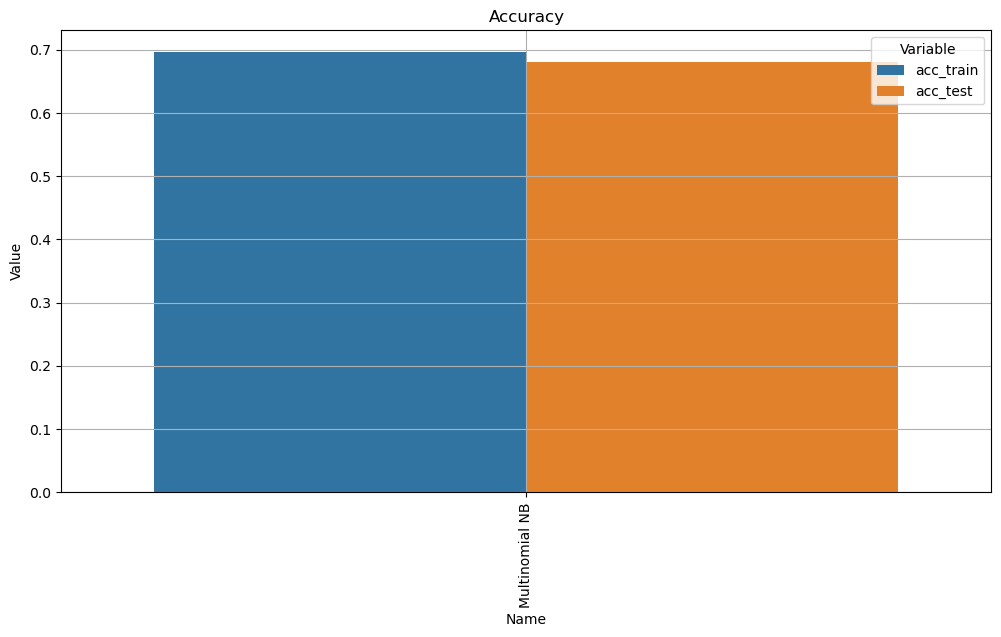

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = results[['acc_train', 'acc_test']].reset_index().melt(id_vars='name').rename(columns=str.title)

# Pintamos el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Value', hue='Variable', data=df_plot)
plt.title("Accuracy")
plt.grid()
plt.xticks(rotation=90)
plt.show()

<hr>


 Elección del modelo


* Pasamos a crear el modelo con todos los datos:

In [35]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

best_model = MultinomialNB()
best_model.fit(X_bow, y)

MultinomialNB()

In [36]:
from sklearn.metrics import classification_report
labels = ['neutral', 'positive', 'negative']
print(classification_report(y_true=y, y_pred=best_model.predict(X_bow), labels=labels))

              precision    recall  f1-score   support

     neutral       0.64      0.71      0.67      9710
    positive       0.76      0.71      0.73      7857
    negative       0.71      0.66      0.68      7202

    accuracy                           0.69     24769
   macro avg       0.70      0.69      0.70     24769
weighted avg       0.70      0.69      0.70     24769



* Obtenemos las métricas del modelo con los propios datos de entrenamiento

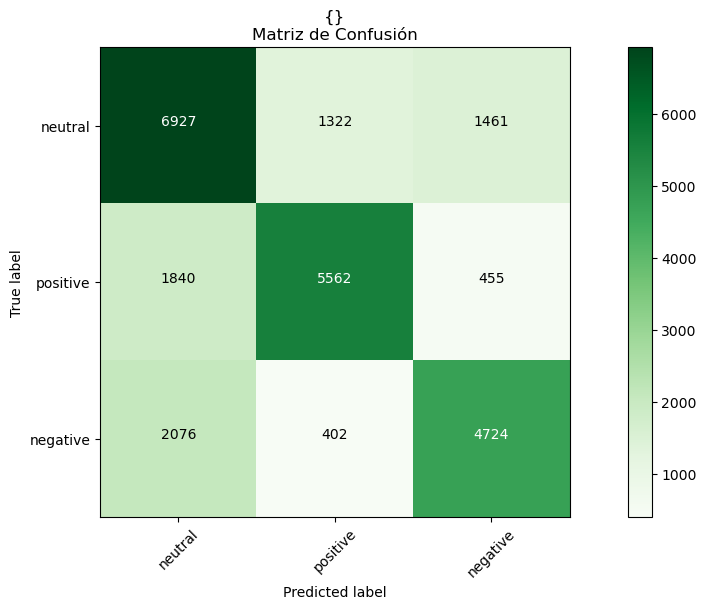

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculamos la matriz de confusión
cm = confusion_matrix(y_true=y, y_pred=best_model.predict(X_bow), labels=labels)   

# Pintamos la matriz de confusión
plt.figure(figsize=(12, 6))
plot_confusion_matrix(cm, classes=labels, title='{}\nMatriz de Confusión')

<hr>


## Bonus Track - Nubes de Palabras (WordCloud)


* Un punto interesante cuando trabajamos con la clasificación de textos subjetivos (Análisis de Sentimientos) es la de ver cuales son las palabras relevantes de cada una de las clases.


* Una representación trivial sería la de crear una gráfica de barras en la que mostrasemos la relación entre la palabra y su frecuencia (el número de veces que aparece). Este tipo de representación (gráfico de barras); cuando trabajamos con textos, no suele aportarnos una información demasiado descriptiva ya que hay pocas palabras dentro de una clase que se repiten muchas veces y otras que siendo relevantes y descriptivas de la clase aparecen 'n' veces menos que la palabra más relevante, por lo tanto tendríamos una gráfica de barras muy desbalanceada.


* Una buena representación para ver la relevancia de las palabras dentro de una clase son las "Nubes de Palabras" (Word Cloud) que son una representación visual de las palabras que conforman un texto, en donde el tamaño es mayor para las palabras que aparecen con más frecuencia.


* Con esta representación podemos ver cuales son las palabras más relevantes así como otras palabras que también son relevantes pero que tienen una menor frecuencia.


* Una de las librerías en python para realizar este tipo de tareas es "WordCloud": https://amueller.github.io/word_cloud/


* Veamos a continuación un sencillo ejemplo de nubes de palabras para todos los Tweets y por partido político.

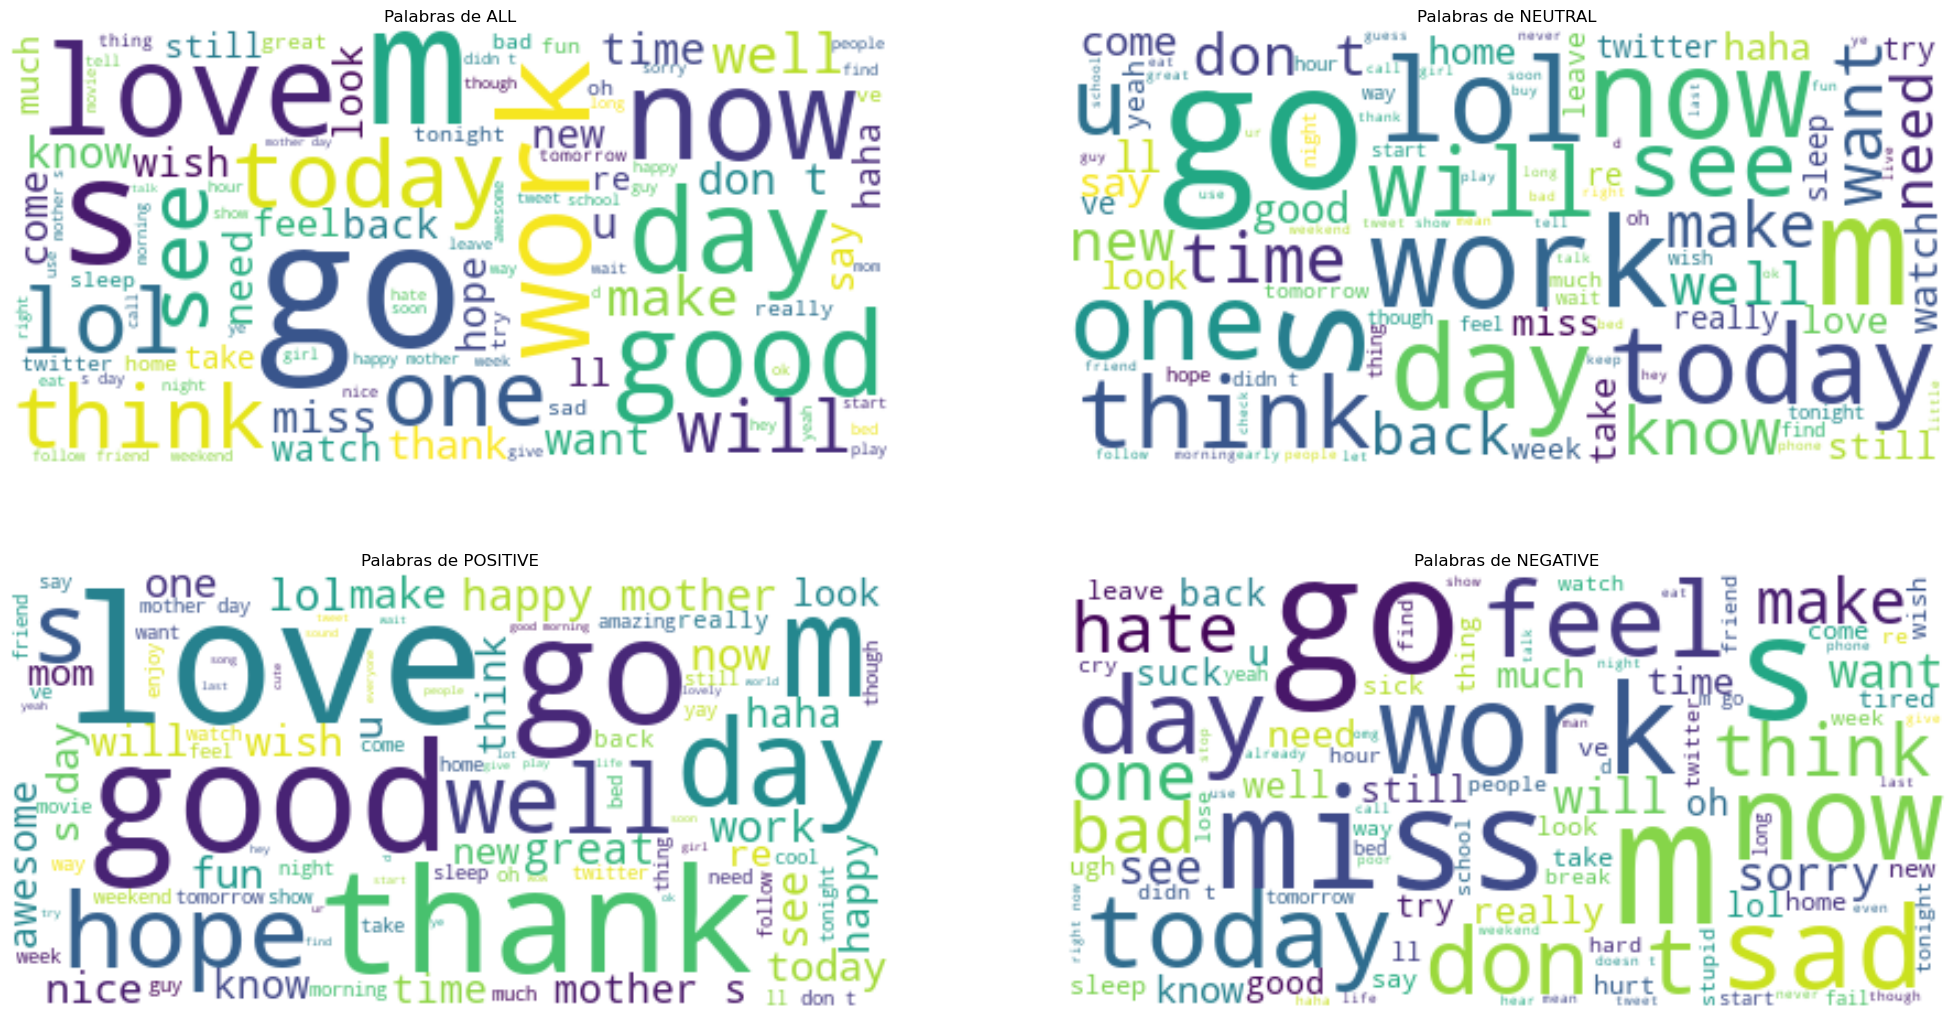

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools
%matplotlib inline


words_partidos = {
    'all': ' '.join([tweet[0] for tweet in X_norm]),
    'neutral': ' '.join([X_norm[i][0] for i, x in enumerate(y) if x == "neutral"]),
    'positive': ' '.join([X_norm[i][0] for i, x in enumerate(y) if x == "positive"]),
    'negative': ' '.join([X_norm[i][0] for i, x in enumerate(y) if x == "negative"])
}

plt.figure(figsize=(25, 20))
pos = 1
for key, words in words_partidos.items():
    plt.subplot(3, 2, pos)
    wordcloud = WordCloud(max_font_size=80, max_words=100, background_color="white").generate(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras de {}".format(key.upper()))
    pos += 1
plt.show()

# Redes  neuronales MLP(Perceptrón Multicapa)

<hr>


## Particionado de Datos (Train y Test)

* Dado que las temáticas de los tweets varian en función del tiempo (tienen caracter temporal), vamos a particionar los datos temporalmente.


* Seleccionaremos como tweets de entrenamiento aquellos que se han escrito hasta una determinada fecha y como tweets de test los últimos tweets escritos.


* Seleccionaremos un 2% de tweets de test, siendo estos los últimos tweets registrados en el dataset (los tweets están escritos de manera cronológica).


* Por tanto nos vamos a quedar con:
    - 98% de datos de entrenamiento
    - 2% de datos de test

In [69]:
# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in X_norm]
y = np.array([doc[1] for doc in X_norm])

# Particionamos los datos en Entrenamiento y Test

PCT_TEST = 0.02
n_tail = len(X) - int(len(X) * PCT_TEST)
print('Corte en el tweet número {} de los {} tweets del Dataset.'.format(n_tail, len(X)))

X_train = X[:n_tail]
y_train = y[:n_tail]
X_test = X[n_tail:]
y_test = y[n_tail:]

print('Tweets de entrenamiento: {}'.format(len(X_train)))
print('Tweets de Test: {}'.format(len(X_test)))

Corte en el tweet número 24274 de los 24769 tweets del Dataset.
Tweets de entrenamiento: 24274
Tweets de Test: 495


<hr>


## Bolsa de palabras y codificación del target


* Al igual que en el notebook *13_PoC_Tendencias_Politicas_Twitter_Generacion_Exportacion_Modelos.ipynb* vamos a trabajar con las 1500 palabras de mayor frecuencia del corpus.


* Realizaremos una codificación del nombre del partido político utilizando la clase "LabelEncoder()" de scikit.

In [70]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer


# Bolsa de Palabras
max_words = 1500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_matrix = tokenizer.texts_to_matrix(X_train, mode='count')
X_matrix_test = tokenizer.texts_to_matrix(X_test, mode='count')

# Codificación del Target
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

<hr>


## Definición de la Red Neuronal



* Para clasificar los tweets en alguna de las 4 tendencias políticas definidas, vamos a crear una red con la siguiente arquitectura:
<span></span><br><br>
    - ***Capa 1***: Capa de entrada con 1000 Neuronas (una por palabra del corpus)
<span></span><br><br>
    - ***Capa 2***: 20 Neuronas con una función de activación 'relu'
<span></span><br><br>
    - ***Capa 3***: 10 Neuronas con una función de activación 'relu'
<span></span><br><br>
    - ***Capa 4***: Capa de salida con 5 neurona (una por tendencia política) y una función de activación 'softmax' para que nos "normalice la salida"
    
    
* Para las capas 2 y 3 vamos a poner un dropout del 20% para que nuestra red no se sobreajuste y generalize mejor


* Por último vamos a compilar la red:
<span></span><br><br>
    - ***Función de perdida: 'categorical_crossentropy'*** (Funciones de Perdida: https://keras.io/losses/)
<span></span><br><br>
    - ***Optimizador: 'adam'*** (Optimizadores: https://keras.io/optimizers/)
<span></span><br><br>
    - Metricas: en cada epoch pediremos que nos muestre el accuracy.

In [71]:
# Se fuerza a usar la CPU y no la GPU en caso de tener GPU en el ordenador
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [72]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

np.random.seed(9)
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=max_words))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


* Una vez creada la red mostramos su arquitectura:
    - 1500 Neuronas de entrada
    - Capa 2: 20 Neuronas
    - Conexiones "capa de entrada -> Capa 2" = (1500*20) + 20 = 30020 Conexiones
    - Capa 3: 10 Neuronas
    - Conexiones "Capa 2 -> Capa 3" = (20*10) + 10 = 210 Conexiones
    - Capa de salida: 4 Neuronas
    - Conexiones "Capa 3 -> Capa de salida" = (10*5) + 5 = 55 Conexiones

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                48032     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 85        
                                                                 
Total params: 48,645
Trainable params: 48,645
Non-trainable params: 0
_________________________________________________________________


<hr>


## Entrenamiento de la Red Neuronal


* Como lo que estamos haciendo es un ejemplo didáctico vamos a poner los siguientes valores:
<span></span><br><br>
    - *batch_size = 64* : Cada 64 tweets se calculan los nuevos pesos de la red
<span></span><br><br>
    - *epochs = 30*
<span></span><br><br>
    - *validation_data = Datos de Test*. Por cada epoch vamos a indicarle que realice una predicción con los datos de test y que vea su acierto.


In [74]:

history = model.fit(X_matrix, 
                    y_train, 
                    batch_size=64, 
                    epochs=10, 
                    verbose=2, 
                    validation_data=(X_matrix_test, y_test))


Epoch 1/10
380/380 - 4s - loss: 1.0157 - accuracy: 0.5315 - val_loss: 0.7742 - val_accuracy: 0.6687 - 4s/epoch - 9ms/step
Epoch 2/10
380/380 - 2s - loss: 0.7571 - accuracy: 0.6837 - val_loss: 0.7076 - val_accuracy: 0.6990 - 2s/epoch - 4ms/step
Epoch 3/10
380/380 - 1s - loss: 0.6865 - accuracy: 0.7178 - val_loss: 0.6907 - val_accuracy: 0.7071 - 1s/epoch - 4ms/step
Epoch 4/10
380/380 - 2s - loss: 0.6470 - accuracy: 0.7377 - val_loss: 0.6788 - val_accuracy: 0.7071 - 2s/epoch - 4ms/step
Epoch 5/10
380/380 - 1s - loss: 0.6054 - accuracy: 0.7581 - val_loss: 0.6782 - val_accuracy: 0.7091 - 1s/epoch - 3ms/step
Epoch 6/10
380/380 - 1s - loss: 0.5750 - accuracy: 0.7693 - val_loss: 0.6747 - val_accuracy: 0.7091 - 1s/epoch - 3ms/step
Epoch 7/10
380/380 - 1s - loss: 0.5433 - accuracy: 0.7852 - val_loss: 0.6846 - val_accuracy: 0.7212 - 1s/epoch - 4ms/step
Epoch 8/10
380/380 - 1s - loss: 0.5089 - accuracy: 0.8007 - val_loss: 0.7022 - val_accuracy: 0.7030 - 1s/epoch - 3ms/step
Epoch 9/10
380/380 - 1s 

* Pintamos como evoluciona la función de perdida y el Accuracy por epoch tanto en entrenamiento como en test.

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pintamos las métricas por epoch
def plot_metric(history, name, remove_first=0):
    metric_train = np.array(history.history[name])[remove_first:]
    metric_test = np.array(history.history['val_{}'.format(name)])[remove_first:]
    acum_avg_metric_train = (np.cumsum(metric_train) / (np.arange(metric_train.shape[-1]) + 1))[remove_first:]
    acum_avg_metric_test = (np.cumsum(metric_test) / (np.arange(metric_test.shape[-1]) + 1))[remove_first:]
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.title('{} - Epochs'.format(name))
    plt.plot(metric_train, label='{} Train'.format(name))
    plt.plot(metric_test, label='{} Test'.format(name))
    plt.grid()
    plt.legend(loc='upper center')
    plt.subplot(1, 2, 2)
    plt.title('AVG ACCUMULATIVE {} - Epochs'.format(name))
    plt.plot(acum_avg_metric_train, label='{} Train'.format(name))
    plt.plot(acum_avg_metric_test, label='{} Test'.format(name))
    plt.grid()
    plt.legend(loc='upper center')
    plt.show()

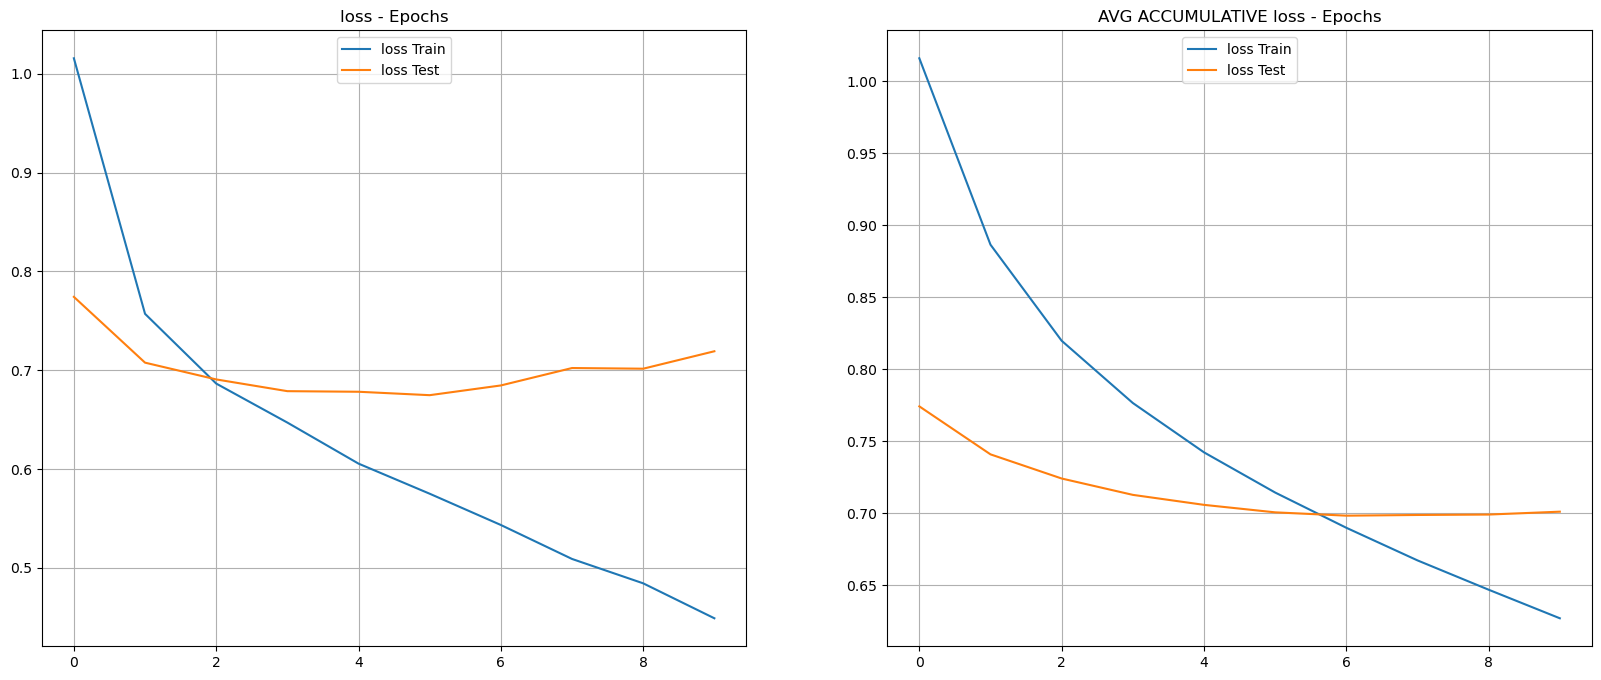

In [76]:
# Función de perdida
plot_metric(history=history, name='loss')

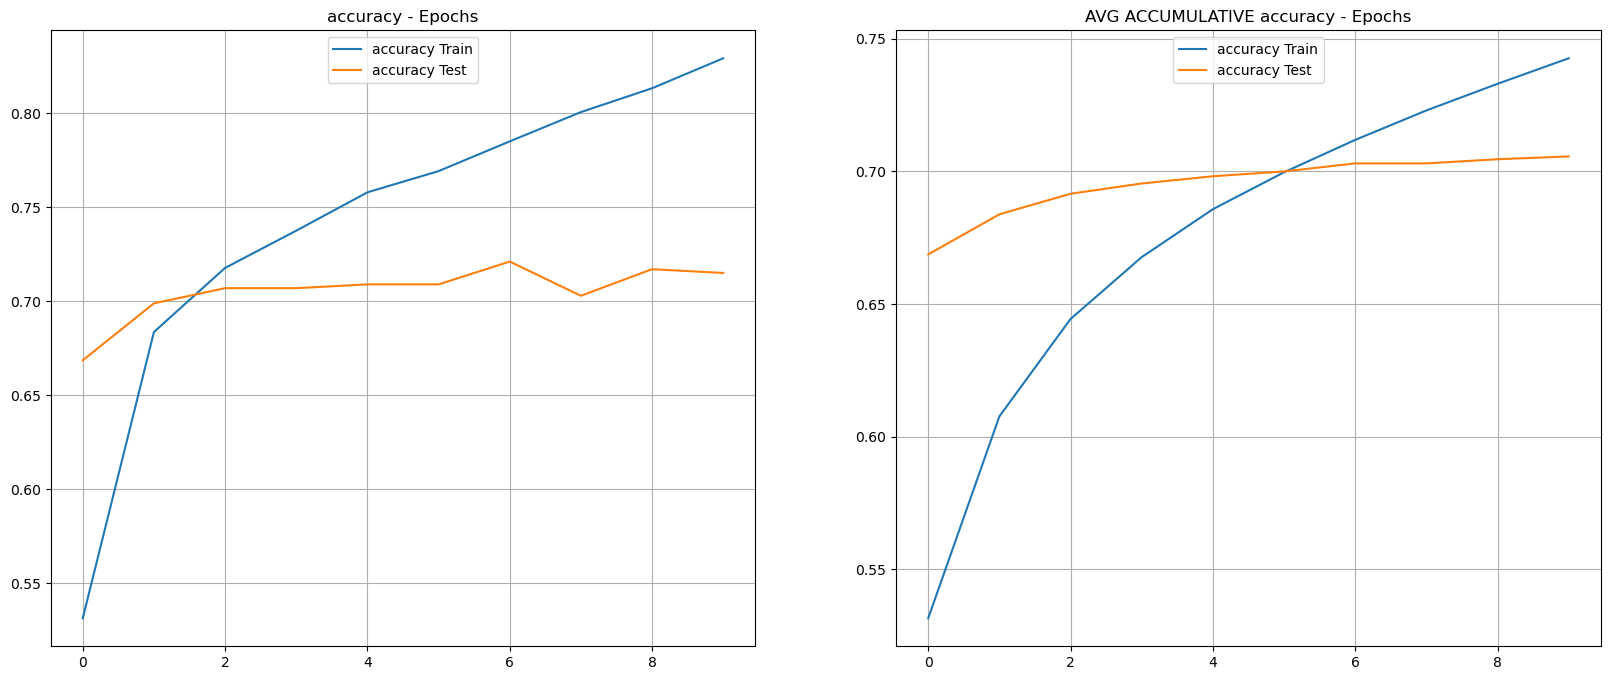

In [77]:
# Accuracy
plot_metric(history=history, name='accuracy')

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

y_true = encoder.inverse_transform(y_test.reshape(-1))
y_pred = np.argmax(model.predict(X_matrix_test), axis=-1)
y_pred = encoder.inverse_transform(y_pred.reshape(-1))

print('Accuracy: {acc:0.4f}'.format(acc=accuracy_score(y_true=y_true, y_pred=y_pred)))
print('F1: {f1:0.4f}'.format(f1=f1_score(y_true=y_true, y_pred=y_pred, average='weighted')))
print('Precision: {pre:0.4f}'.format(pre=precision_score(y_true=y_true, y_pred=y_pred, average='weighted')))
print('Recall: {rec:0.4f}'.format(rec=recall_score(y_true=y_true, y_pred=y_pred, average='weighted')))
print(classification_report(y_true=y_true, y_pred=y_pred))
labels = ['positive', 'negative', 'neutral']
confusion_matrix_test = confusion_matrix(y_true=y_true,
                                         y_pred=y_pred,
                                         labels=labels)
confusion_matrix_train = confusion_matrix(y_true=encoder.inverse_transform(y_train.reshape(-1)), 
                                          y_pred=encoder.inverse_transform(np.argmax(model.predict(X_matrix), axis=-1)), 
                                          labels=labels)



16/16 [==============================] - 0s 3ms/step
Accuracy: 0.7152
F1: 0.7145
Precision: 0.7142
Recall: 0.7152
              precision    recall  f1-score   support

    negative       0.70      0.69      0.70       131
     neutral       0.69      0.66      0.68       197
    positive       0.76      0.79      0.77       167

    accuracy                           0.72       495
   macro avg       0.71      0.72      0.72       495
weighted avg       0.71      0.72      0.71       495

759/759 [==============================] - 2s 2ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Pintamos las matrices de confusión
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(confusion_matrix_train, classes=labels, title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix_test, classes=labels, title='Matriz de Confusión  Datos Test')
plt.show()

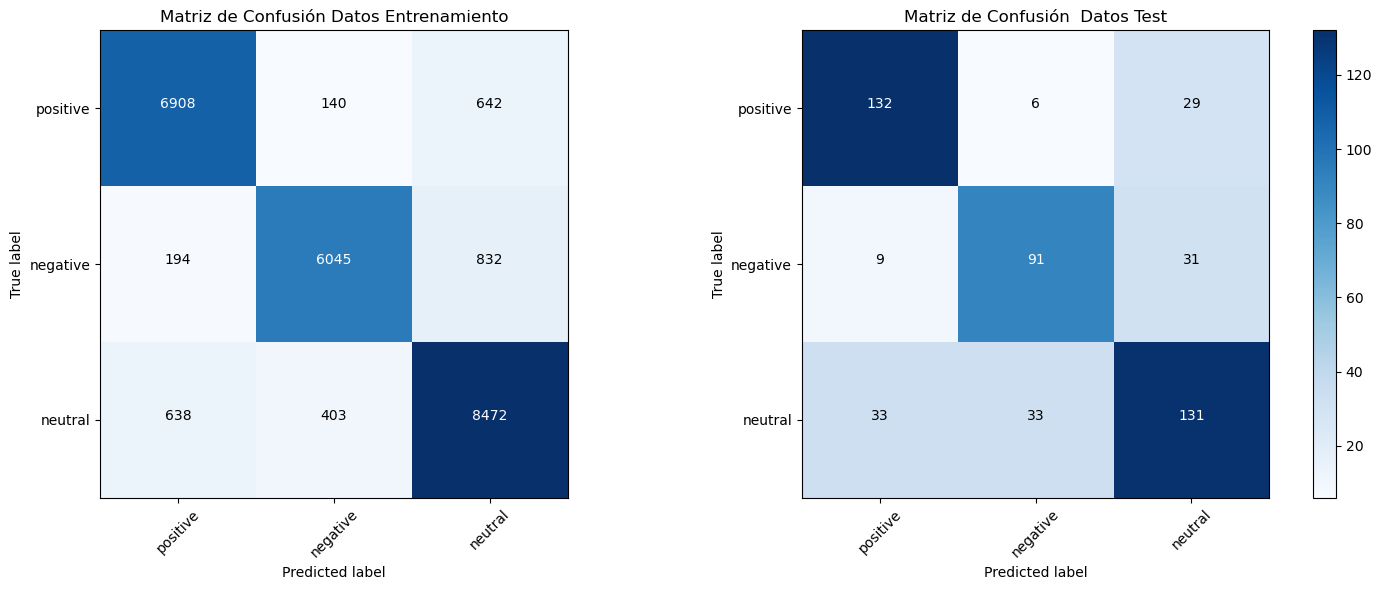

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Pintamos las matrices de confusión
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(confusion_matrix_train, classes=labels, title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix_test, classes=labels, title='Matriz de Confusión  Datos Test')
plt.show()

# Redes Neuronales Recurrentes LSTM (Long Short-Term Memory)

In [4]:
import pickle

filename = 'normalized_tweets_LSTM.pickle'
X_norm = pickle.load(open(filename, 'rb'))

In [7]:
# Divido los datos en dos listas 
#     X: los tweets
#     y: target (polaridad)

X = [doc[0] for doc in X_norm]
y = np.array([doc[1] for doc in X_norm])

# Particionamos los datos en Entrenamiento y Test

PCT_TEST = 0.02
n_tail = len(X) - int(len(X) * PCT_TEST)
print('Corte en el tweet número {} de los {} tweets del Dataset.'.format(n_tail, len(X)))

X_train = X[:n_tail]
y_train = y[:n_tail]
X_test = X[n_tail:]
y_test = y[n_tail:]

print('Tweets de entrenamiento: {}'.format(len(X_train)))
print('Tweets de Test: {}'.format(len(X_test)))


Corte en el tweet número 24274 de los 24769 tweets del Dataset.
Tweets de entrenamiento: 24274
Tweets de Test: 495


<hr>


## One-Hot Encoding y codificación del target


* Con las Redes Neuronales Recurrentes vamos a tratar los tweets como secuencias de palabras y por tanto tenemos que realizar una codificación de todas palabras que aparecen en los tweets.


* Para ello TensorFlow nos proporciona una función llamada "one_hot" que dado un texto y el tamaño que tendrá nuestro vocabulario, nos codifica el texto por palabras. En el siguiente enlace esta la documentación de esta función:<br>
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/one_hot


* Veamos a continuación un ejemplo de como codificamos los textos:


```python
one_hot("Esto es un ejemplo de onehot encoding", 100)
```

```ssh
>> [6, 88, 30, 81, 31, 52, 22]
```

* Si realizamos una codificación de un string que continene palabras identicas, nos lo codifica con el mismo identificador como es de esperar:

```python
one_hot("Esto es otro ejemplo", 100)
```

```ssh
>> [6, 88, 79, 81]
```


* Por tanto vemos como utiliza identificadores numéricos del 1 al 100 para codificar las palabras de los strings:

    + "Esto" = 6
    + "es" = 88
    + "un" = 30
    + "ejemplo" = 81
    + "de" = 31
    + "onehot" = 52
    + "encoding" = 22
    + "otro" = 79
    
    
* Los identificadores que asigna a las palabras los obtiene aplicando una función "*hash*" a las palabras, de ahí que no sea necesario crear un "modelo" de "one-hot Encode" (como en scikit) para codificar otros strings (strings a predecir). 


* Lo único que hay que respetar para que nos codifique una misma palabra con el mismo identificador es el ***tamaño del vocabulario 'n'*** que se le pasa a la función "*one_hot(text, n)*" que en el ejemplo puesto anteriormente tiene valor *100*.


* Este valor '*n*' del vocabulario debe de tener (a priori) un valor lo suficientemente grande como para poder codificar todas las posibles palabras que podamos utilizar en una lengua (Español, Inglés, Alemán, etc.).


* El último paso que vamos a realizar es la codificación del nombre del partido político utilizando la clase "LabelEncoder()" de scikit.
    

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import one_hot

# Hacemos un one-hot encoder del texto
VOCAB_SIZE = 100000 # Poner un valor muy alto
X_train = [one_hot(doc, VOCAB_SIZE) for doc in X_train]
X_test = [one_hot(doc, VOCAB_SIZE) for doc in X_test]

# Codificación del Target  0 1 2 3
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

<hr>


## Creacción de las secuencias de palabras


* Las Redes Neuronales necesitan un tamaño fijo de entrada y los tweets tienen un número variable de palabras, por lo que hay que hay que transformar los tweets a secuencias de palabras de tamaño fijo.


* Para realizar esta labor, TensorFlow nos proporciona la función "*pad_sequences(sequences, maxlen)*" que dada una lista de secuencias nos devuelve esa secuencia con el tapaño que le hayamos indicado como parámetro, rellenando en caso de que la secuencia sea de mayor tamaño con algún valor por defecto (en principio a cero). En el siguiente enlace esta la documentación de esta función:<br>
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences


* Un ejemplo de esta función sería la siguiente, en el que indicamos que nos devuelva las secuencias que le pasamos como parámetro con un tamaño de '10' posiciones y rellenando las posiciones faltantes con ceros (value=0) añadiendolos al final de la secuencia (padding='post'):

```python
sequences = [[6, 88, 30, 81, 31, 52, 22], [6, 88, 79, 81]]
pad_sequences(sequences=sequences, maxlen=10, padding='post', value=0)
```


```ssh
array([[ 6, 88, 30, 81, 31, 52, 22,  0,  0,  0],
       [ 6, 88, 79, 81,  0,  0,  0,  0,  0,  0]], dtype=int32)
```


* A continuación pasamos a crear las secuencias de los tweets (50 elementos) tanto de entrenamiento como de test:


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS_TWEET = 50
pad_corpus_train = pad_sequences(X_train, maxlen=MAX_WORDS_TWEET, padding='post')
pad_corpus_test = pad_sequences(X_test, maxlen=MAX_WORDS_TWEET, padding='post')

<hr>


## Definición de la Red Neuronal


* La arquitectura de la red para la clasificación de las tendencias políticas es la siguiente:
<span></span><br><br>
    - ***Capa Embedding***: Capa de Embedding que soportará un tamaño de 100.000 palabras (VOCAB_SIZE) y cada palabra estará representada por 32 características (EMBEDDING_SIZE). -*ver Bonus Track II*-
<span></span><br><br>
    - ***Capa LSTM***: Capa LSTM con 32 celdas de memoria. Son 32 por el tamaño de representación de la palabra (EMBEDDING_SIZE).
<span></span><br><br>
    - ***Capa 4***: Capa de salida con 5 neurona (una por tendencia política) y una función de activación 'softmax' para que nos "normalice la salida"
    
    
* Para la capa de salida aplicamos un dropout del 20% para que nuestra red no se sobreajuste y generalize mejor


* Por último vamos a compilar la red:
<span></span><br><br>
    - ***Función de perdida: 'categorical_crossentropy'*** (Funciones de Perdida: https://www.tensorflow.org/api_docs/python/tf/keras/losses). En realidad usaremos la '*sparse_categorical_crossentropy*' ya que la salida no la hemos codificado con un one-hot encoding \[\[1,0,0,0,0\], \[0,1,0,0,0\], ..., \[0,0,0,0,1\],\] si no con un label encode \[0,1,2,3,4\].
<span></span><br><br>
    - ***Optimizador: 'adam'*** (Optimizadores: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
<span></span><br><br>
    - Metricas: en cada epoch pediremos que nos muestre el accuracy.

In [10]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

EMBEDDING_SIZE = 32

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_SIZE))
model.add(LSTM(EMBEDDING_SIZE))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprimimos la arquitectura de la red
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3200000   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 3,208,485
Trainable params: 3,208,485
Non-trainable params: 0
_________________________________________________________________


* Parámetros a calcular en la red:
    - Capa de Embedding: -> 100000 palabras * 32 caracterísiticas = 3200000
    - Capa LSTM: 4*(32 * 32 + 32<sup>2</sup> + 32) = 8320
    - Conexiones "LSTM -> Capa salida" = (32 * 5) + 5 = 165
    
    
<hr>


## Entrenamiento de la Red Neuronal


* Vamos a entrenar la red con los siguientes parámetros:
<span></span><br><br>
    - *batch_size = 128* : Cada 128 tweets se calculan los nuevos pesos de la red
<span></span><br><br>
    - *epochs = 10*
<span></span><br><br>
    - *validation_split = datos de test* 
    

* Dado que puede ser un entrenamiento muy pesado y que puede tardar varios minútos, vamos a utilizar la herramienta del "Tensorboard" para monitorizar la evolución de la función de perdida y el Accuracy.


* Para más información sobre esta herramienta ver el siguiente enlace:<br>https://www.tensorflow.org/tensorboard


* Básicamente lo que hacer Tensorboard es leer una serie de logs y representar esos logs por medio de una interfaz web.


* Para representar la evolución de la función de perdida y el Accuracy, tenemos que escribir estos valores en un log que debemos guardarlos en una ruta conocida ('tensorboard_logs/FECHA_EJECUCION') y que generaremos  en el siguiente código.


* Para instanciar el Tensorboard lo hacemos de la siguiente manera por consola, pasandole como parámetro la ruta donde se encuentran los logs: 
```ssh
>> tensorboard --logdir ./tensorboard_logs/
```

* Una vez instanciado el Tensorboard nos indicará que abramos en el navegador el siguiente enlace:<br> http://localhost:6006/

In [12]:
# Se fuerza a usar la CPU y no la GPU en caso de tener GPU en el ordenador
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [13]:
import datetime
import numpy as np
import time
import pandas as pd

In [14]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

# Configuramos TensorBoard
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs('tensorboard_logs/{}'.format(now))
tensorboard_path = os.path.join('tensorboard_logs', now)
tensorboard = TensorBoard(log_dir=tensorboard_path,
                          histogram_freq=2,
                          write_graph=True,
                          write_images=True)

# Creamos el checkpoint para exportar el modelo que mejor accuracy tiene con los datos de test
model_path ='./models/LSTM_Best_Model'
checkpoint = ModelCheckpoint(model_path,
                             monitor='val_accuracy',
                             save_best_only = True,
                             save_weights_only = False,
                             mode='max',
                             verbose=0)

history=model.fit(pad_corpus_train, 
                  y_train, 
                  batch_size=128, 
                  epochs=15, 
                  validation_data=(pad_corpus_test, y_test), 
                  verbose=2,
                  callbacks=[tensorboard, checkpoint])



Epoch 1/15
INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


190/190 - 34s - loss: 1.1693 - accuracy: 0.3545 - val_loss: 1.0934 - val_accuracy: 0.3980 - 34s/epoch - 181ms/step
Epoch 2/15
190/190 - 22s - loss: 1.1073 - accuracy: 0.3692 - val_loss: 1.0952 - val_accuracy: 0.3980 - 22s/epoch - 114ms/step
Epoch 3/15
INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


190/190 - 30s - loss: 1.0977 - accuracy: 0.3796 - val_loss: 1.0224 - val_accuracy: 0.5313 - 30s/epoch - 159ms/step
Epoch 4/15
INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


190/190 - 26s - loss: 0.8140 - accuracy: 0.6359 - val_loss: 0.7382 - val_accuracy: 0.6848 - 26s/epoch - 138ms/step
Epoch 5/15
190/190 - 24s - loss: 0.6275 - accuracy: 0.7539 - val_loss: 0.7388 - val_accuracy: 0.6848 - 24s/epoch - 125ms/step
Epoch 6/15
INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


INFO:tensorflow:Assets written to: ./models\LSTM_Best_Model\assets


190/190 - 32s - loss: 0.5339 - accuracy: 0.8059 - val_loss: 0.7537 - val_accuracy: 0.7152 - 32s/epoch - 169ms/step
Epoch 7/15
190/190 - 22s - loss: 0.4508 - accuracy: 0.8470 - val_loss: 0.8161 - val_accuracy: 0.6929 - 22s/epoch - 115ms/step
Epoch 8/15
190/190 - 20s - loss: 0.3927 - accuracy: 0.8755 - val_loss: 0.9062 - val_accuracy: 0.6505 - 20s/epoch - 107ms/step
Epoch 9/15
190/190 - 26s - loss: 0.3556 - accuracy: 0.8926 - val_loss: 0.9737 - val_accuracy: 0.6525 - 26s/epoch - 137ms/step
Epoch 10/15
190/190 - 22s - loss: 0.3172 - accuracy: 0.9070 - val_loss: 0.9770 - val_accuracy: 0.6687 - 22s/epoch - 116ms/step
Epoch 11/15
190/190 - 28s - loss: 0.2897 - accuracy: 0.9176 - val_loss: 1.0207 - val_accuracy: 0.6646 - 28s/epoch - 147ms/step
Epoch 12/15
190/190 - 30s - loss: 0.2683 - accuracy: 0.9242 - val_loss: 1.0086 - val_accuracy: 0.6606 - 30s/epoch - 157ms/step
Epoch 13/15
190/190 - 25s - loss: 0.2512 - accuracy: 0.9312 - val_loss: 1.0589 - val_accuracy: 0.6566 - 25s/epoch - 129ms/step

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pintamos las métricas por epoch
def plot_metric(history, name, remove_first=0):
    metric_train = np.array(history.history[name])[remove_first:]
    metric_test = np.array(history.history['val_{}'.format(name)])[remove_first:]
    acum_avg_metric_train = (np.cumsum(metric_train) / (np.arange(metric_train.shape[-1]) + 1))[remove_first:]
    acum_avg_metric_test = (np.cumsum(metric_test) / (np.arange(metric_test.shape[-1]) + 1))[remove_first:]
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.title('{} - Epochs'.format(name))
    plt.plot(metric_train, label='{} Train'.format(name))
    plt.plot(metric_test, label='{} Test'.format(name))
    plt.grid()
    plt.legend(loc='upper center')
    plt.subplot(1, 2, 2)
    plt.title('AVG ACCUMULATIVE {} - Epochs'.format(name))
    plt.plot(acum_avg_metric_train, label='{} Train'.format(name))
    plt.plot(acum_avg_metric_test, label='{} Test'.format(name))
    plt.grid()
    plt.legend(loc='upper center')
    plt.show()

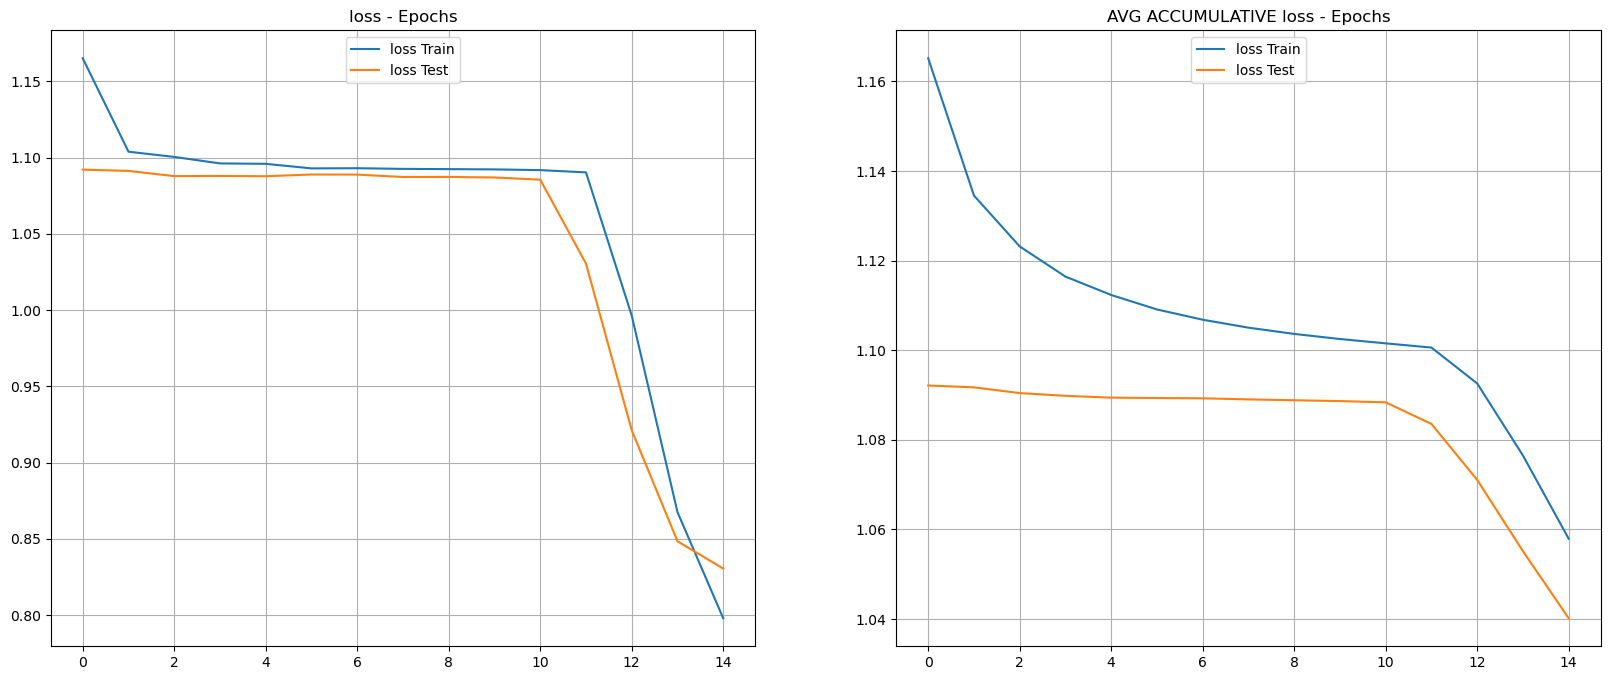

In [21]:
# Función de perdida
plot_metric(history=history, name='loss')

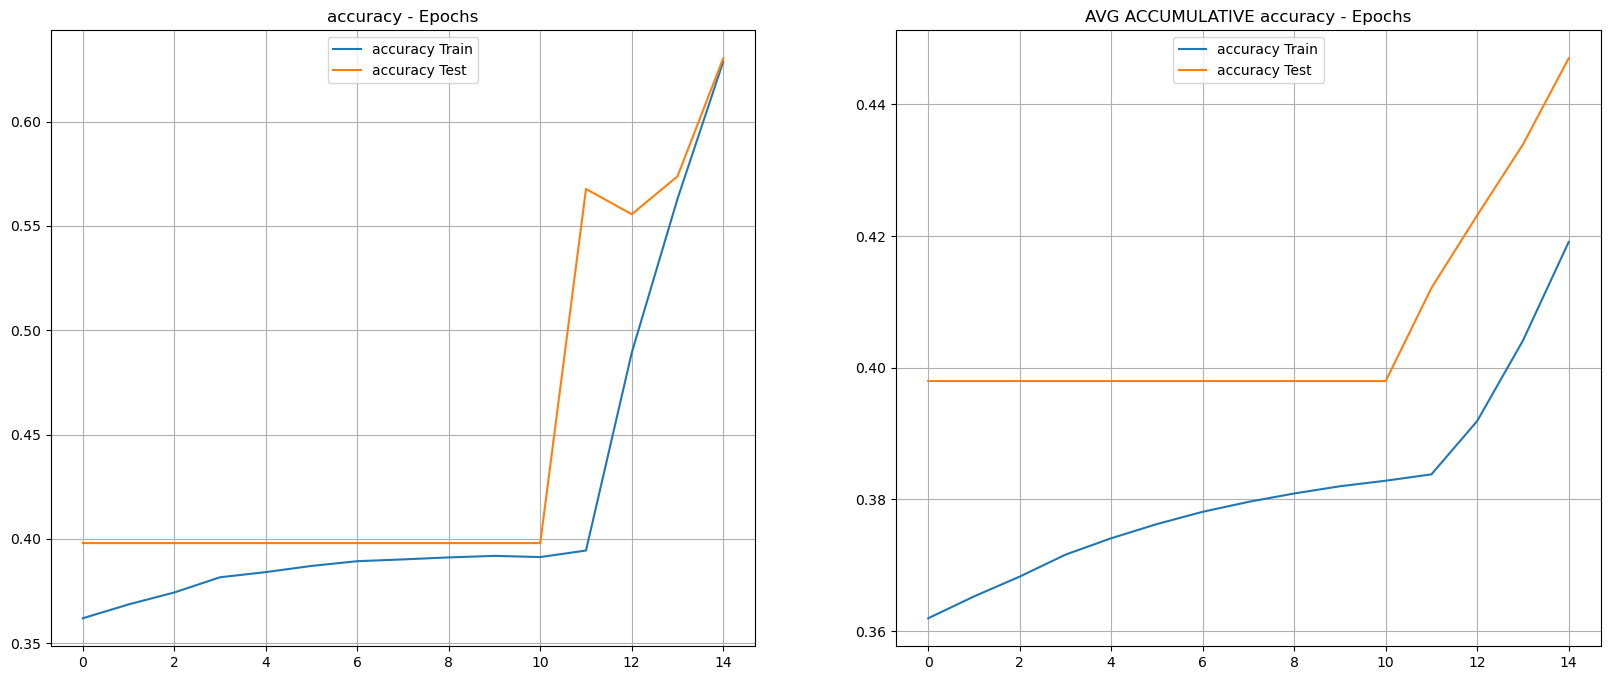

In [22]:
# Accuracy
plot_metric(history=history, name='accuracy')

<hr>


## Evaluamos el (mejor) modelo

* Pasamos a evaluar el modelo con los datos de test, calculando las siguientes métricas de evaluación:

    1. **Accuracy**
    2. **Precision**
    3. **Recall**
    4. **F1**

* Importamos el mejor modelo creado

In [23]:
from tensorflow.keras.models import load_model

model = load_model(model_path)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

y_true = encoder.inverse_transform(y_test.reshape(-1))
y_pred = np.argmax(model.predict(pad_corpus_test), axis=-1)
y_pred = encoder.inverse_transform(y_pred.reshape(-1))

print('Accuracy: {acc:0.4f}'.format(acc=accuracy_score(y_true=y_true, y_pred=y_pred)))
print('F1: {f1:0.4f}'.format(f1=f1_score(y_true=y_true, y_pred=y_pred, average='weighted')))
print('Precision: {pre:0.4f}'.format(pre=precision_score(y_true=y_true, y_pred=y_pred, average='weighted')))
print('Recall: {rec:0.4f}'.format(rec=recall_score(y_true=y_true, y_pred=y_pred, average='weighted')))
print(classification_report(y_true=y_true, y_pred=y_pred))
labels = ['positive', 'negative', 'neutral']
confusion_matrix_test = confusion_matrix(y_true=y_true,
                                         y_pred=y_pred,
                                         labels=labels)
confusion_matrix_train = confusion_matrix(y_true=encoder.inverse_transform(y_train.reshape(-1)), 
                                          y_pred=encoder.inverse_transform(np.argmax(model.predict(pad_corpus_train), axis=-1)), 
                                          labels=labels)


16/16 [==============================] - 0s 10ms/step
Accuracy: 0.6303
F1: 0.6320
Precision: 0.6342
Recall: 0.6303
              precision    recall  f1-score   support

    negative       0.54      0.57      0.56       131
     neutral       0.57      0.57      0.57       197
    positive       0.78      0.74      0.76       167

    accuracy                           0.63       495
   macro avg       0.63      0.63      0.63       495
weighted avg       0.63      0.63      0.63       495

759/759 [==============================] - 7s 9ms/step


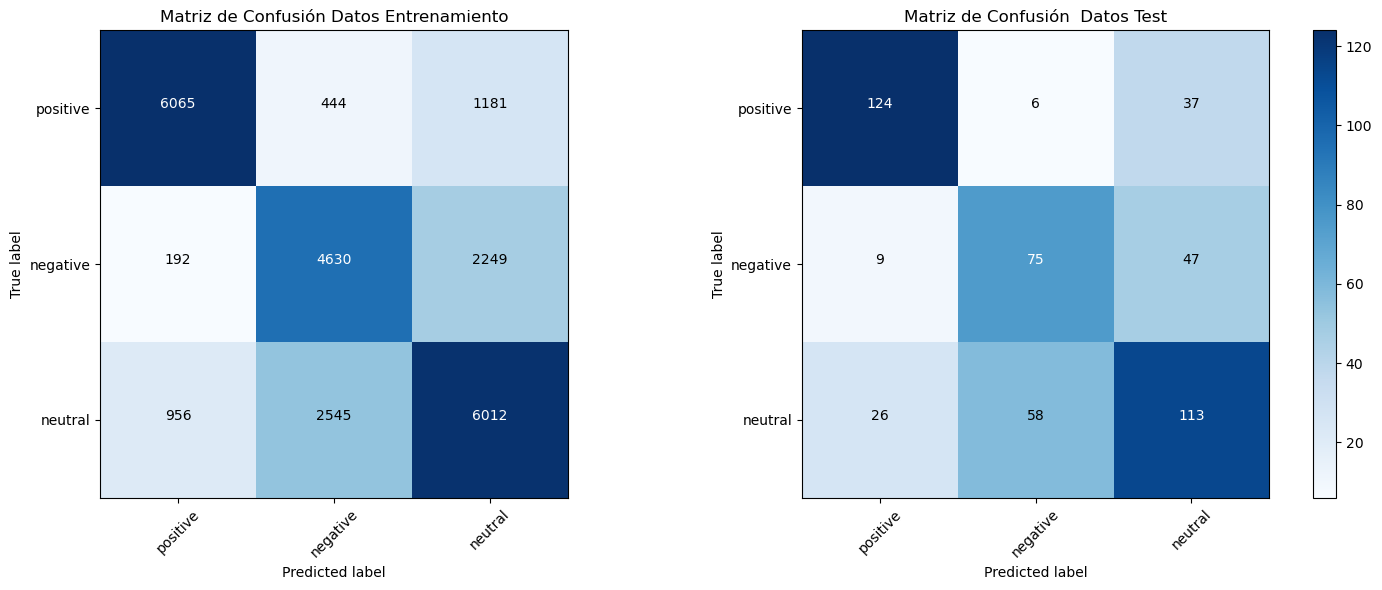

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Pintamos las matrices de confusión
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(confusion_matrix_train, classes=labels, title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix_test, classes=labels, title='Matriz de Confusión  Datos Test')
plt.show()